In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [20]:
# parsing through the data 
data1 = pd.read_csv("matlab_sim/data3.csv")
n1 = np.array([])
N1 = np.array([])
for i in range(101):
    n1 = np.append(n1, data1.n.iloc[i])
    N1 = np.append(N1, data1.N.iloc[i])

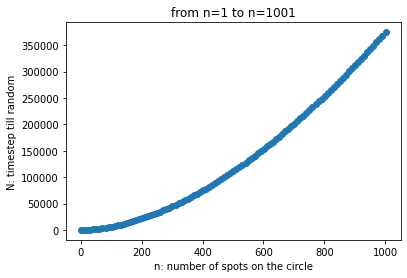

In [21]:
# plotting the figure 
plt.ion()
plt.figure()
plt.plot(n1, N1, 'o')
plt.title('from n=1 to n=1001')
plt.xlabel('n: number of spots on the circle')
plt.ylabel('N: timestep till random')
plt.show()

## fit the figure to a function 

In [22]:
# compute the Mean square error of this fit 
def calculate_mse(f, a, b, xdata=n1, ydata=N1):
    mse = 0
    for i in range(len(xdata)):
        mse += (ydata[i] - f(xdata[i], a, b))**2
    mse = mse / len(xdata)
    return mse


# create a function to fit the data to a specific kind of function
def fit(f):
    # fit the data
    params, cov = curve_fit(f=f, xdata=n1, ydata=N1, p0=[1,1], bounds=(-np.inf, np.inf))
    std_deviation = np.sqrt(np.diag(cov))
    print('the parameter a, b are: ', params)
    print('the standard deviation of a, b are: ', std_deviation)
    # print('the covariance matrix of a, b is: ')
    # print(cov)

    # plot the fit
    plt.plot(n1, N1, 'o', label='data')
    plt.plot(n1, f(n1, params[0], params[1]), label='fit')
    plt.legend()

    # calculate the mean square error
    mse = calculate_mse(f, params[0], params[1])
    print('the mean square error is: ', mse)

### exponential growth

the parameter a, b are:  [1. 1.]
the standard deviation of a, b are:  [inf inf]
the mean square error is:  inf


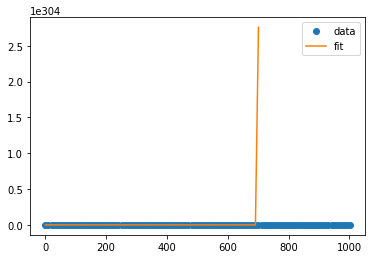

In [23]:
def exponential(x, a, b):
    return a * np.exp(b * x)  # y = a * e^(bx)

fit(exponential)

### power growth

the parameter a, b are:  [2.01761668 1.75631888]
the standard deviation of a, b are:  [0.01616257 0.00119639]
the mean square error is:  220281.55681167962


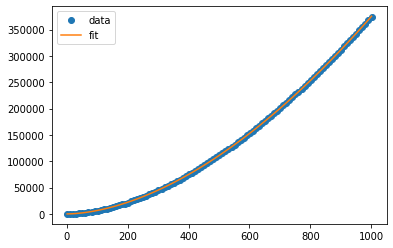

In [24]:
def power(x, a, b):
    return a * np.power(x, b)  # y = a * x^b

fit(power)